In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('train.csv')

In [17]:
df['DATETIME'] = pd.to_datetime(df['DATETIME']) 
df_datetime = df.set_index('DATETIME') 

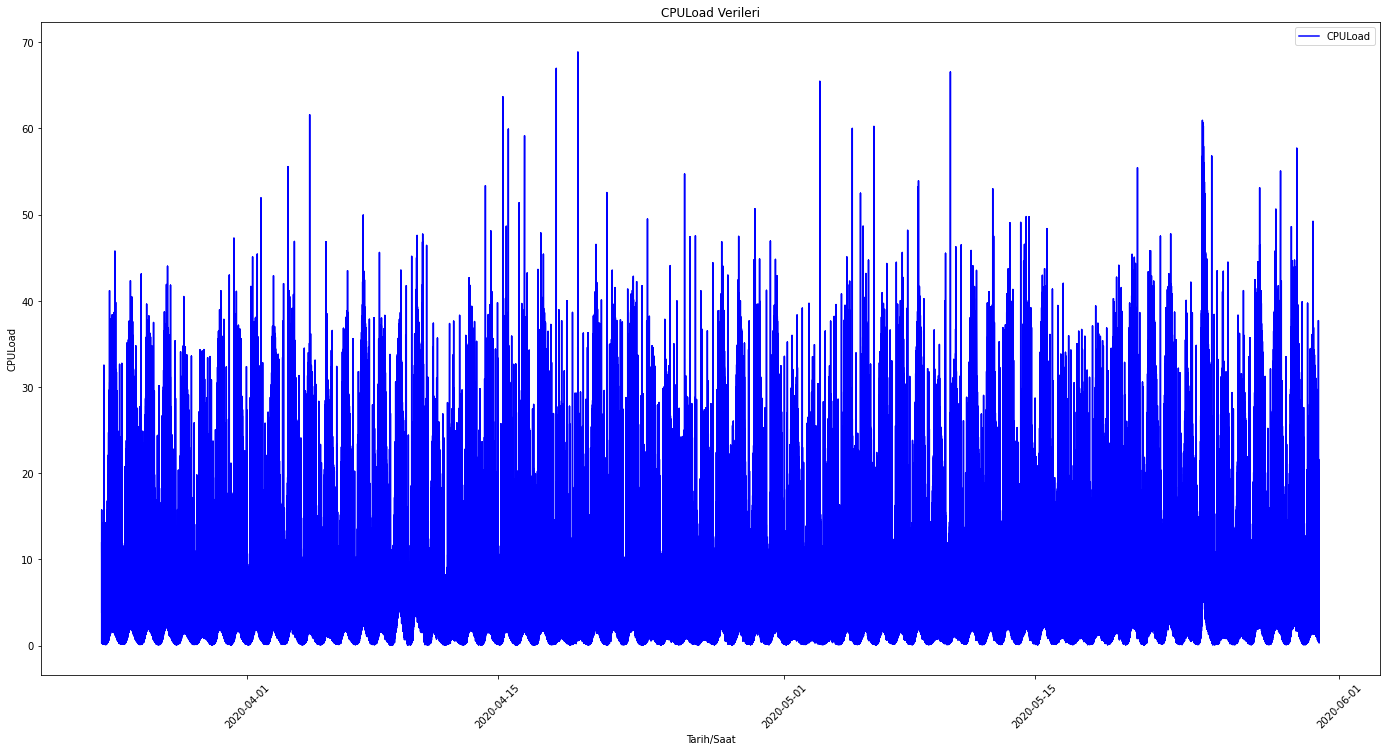

In [18]:
# CPULoad-date
plt.figure(figsize=(24, 12))
plt.plot(df_datetime['CPULOAD'], color='blue', label='CPULoad')
plt.title('CPULoad Verileri')
plt.xlabel('Tarih/Saat')
plt.ylabel('CPULoad')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

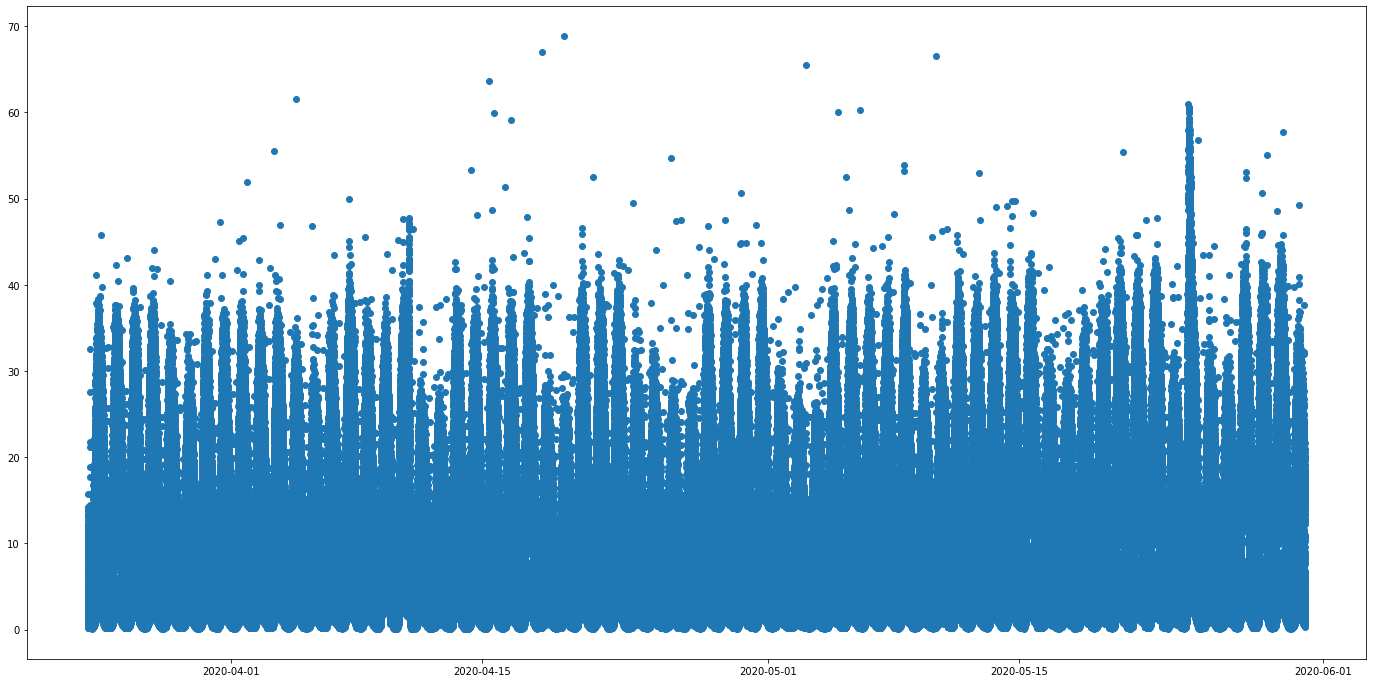

In [21]:
# CPULoad-date
plt.figure(figsize=(24, 12))
plt.scatter(df['DATETIME'], df['CPULOAD'])

plt.show()

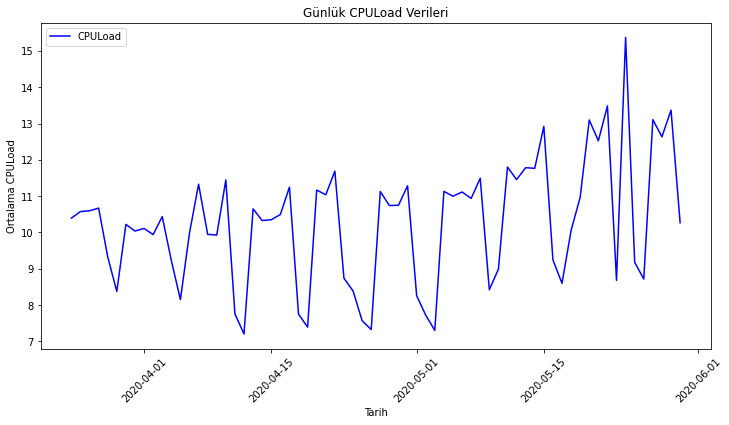

In [6]:
df['DATE'] = df['DATETIME'].dt.date 
df = df.groupby('DATE').mean()  

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CPULOAD'], color='blue', label='CPULoad')
plt.title('Günlük CPULoad Verileri')
plt.xlabel('Tarih')
plt.ylabel('Ortalama CPULoad')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

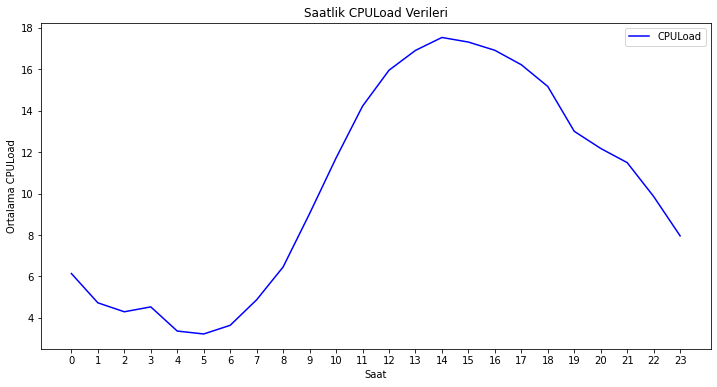

In [7]:
df = pd.read_csv('train.csv')
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df['HOUR'] = df['DATETIME'].dt.hour 
df = df.groupby('HOUR').mean()  

# Saatlere göre ortalama CPULoad verileri
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['CPULOAD'], color='blue', label='CPULoad')
plt.title('Saatlik CPULoad Verileri')
plt.xlabel('Saat')
plt.ylabel('Ortalama CPULoad')
plt.legend(loc='best')
plt.xticks(df.index)
plt.show()

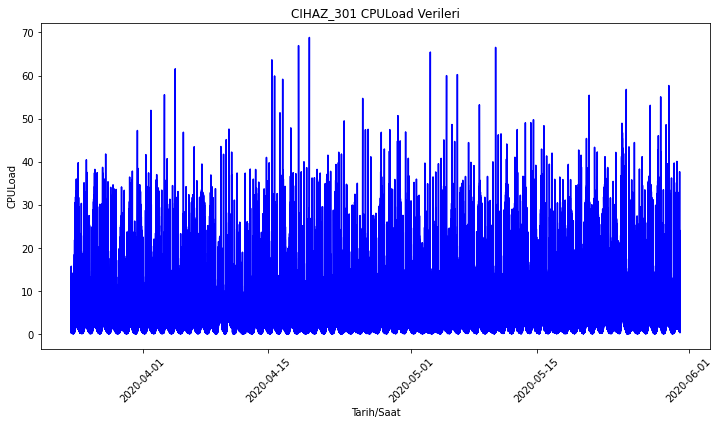

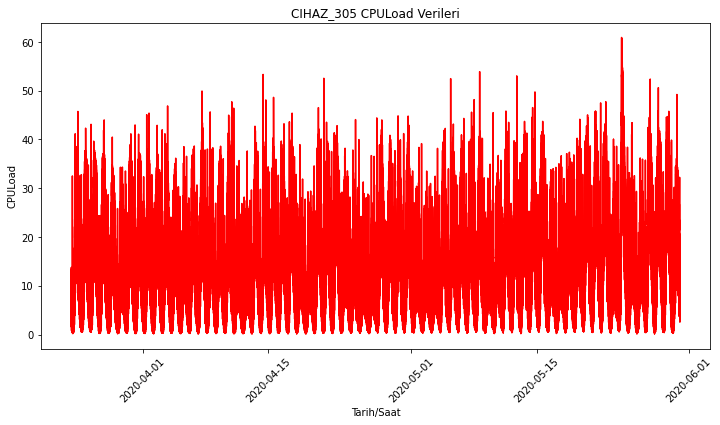

In [10]:
df = pd.read_csv('train.csv')
df['DATETIME'] = pd.to_datetime(df['DATETIME'])  # Tarih/saat sütununu datetime formatına dönüştür

# Server 1 için grafik oluştur
df_server1 = df[df['SERVER'] == 'CIHAZ_301']
plt.figure(figsize=(12, 6))
plt.plot(df_server1['DATETIME'], df_server1['CPULOAD'], color='blue')
plt.title('CIHAZ_301 CPULoad Verileri')
plt.xlabel('Tarih/Saat')
plt.ylabel('CPULoad')
plt.xticks(rotation=45)
plt.show()

# Server 2 için grafik oluştur
df_server2 = df[df['SERVER'] == 'CIHAZ_305']
plt.figure(figsize=(12, 6))
plt.plot(df_server2['DATETIME'], df_server2['CPULOAD'], color='red')
plt.title('CIHAZ_305 CPULoad Verileri')
plt.xlabel('Tarih/Saat')
plt.ylabel('CPULoad')
plt.xticks(rotation=45)
plt.show()


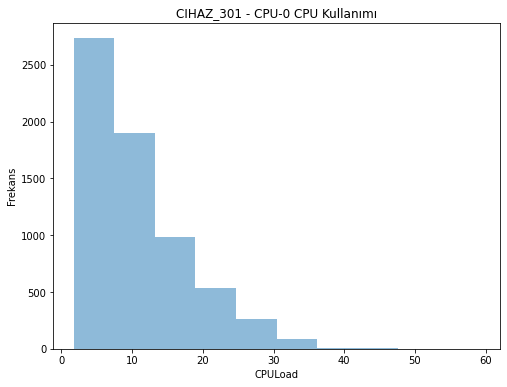

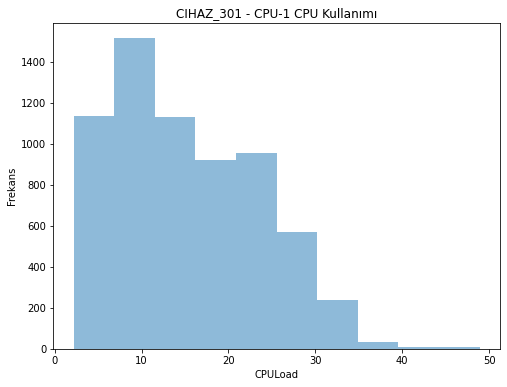

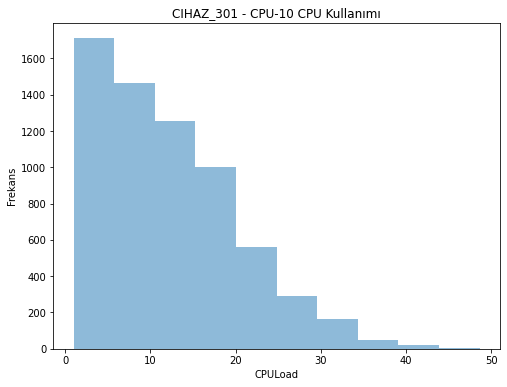

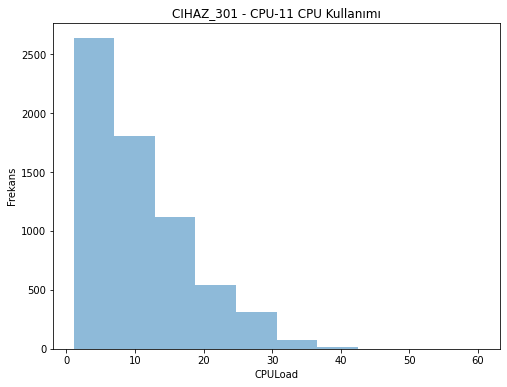

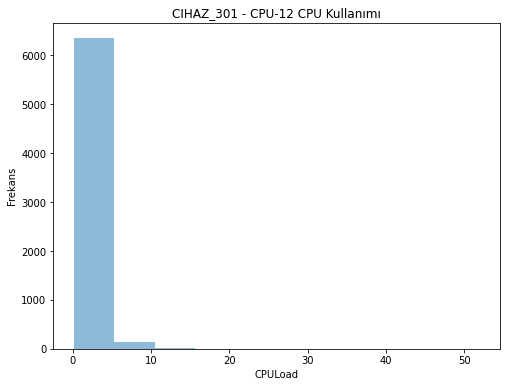

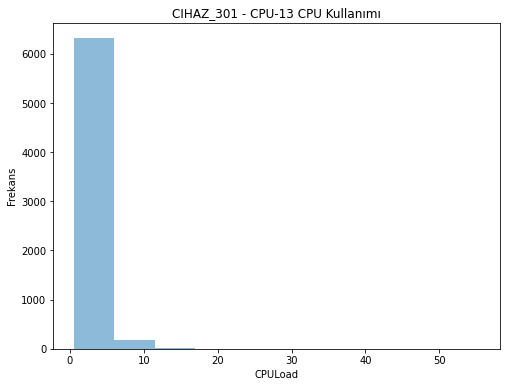

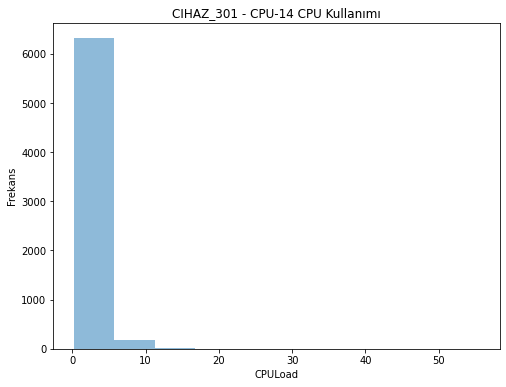

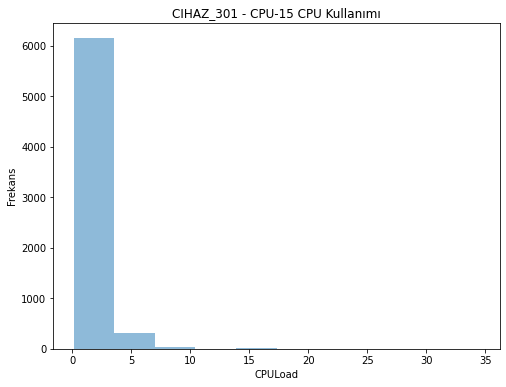

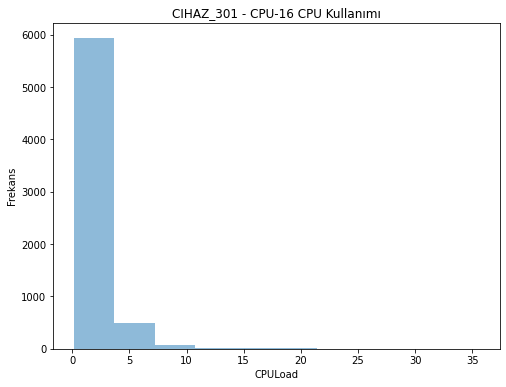

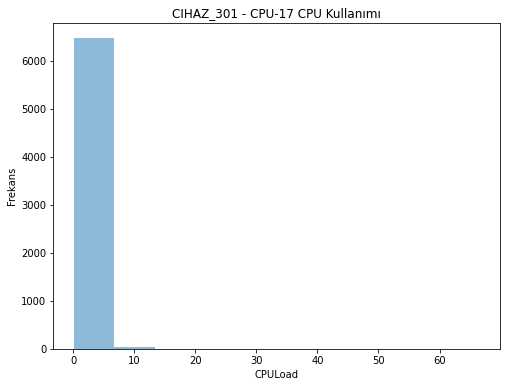

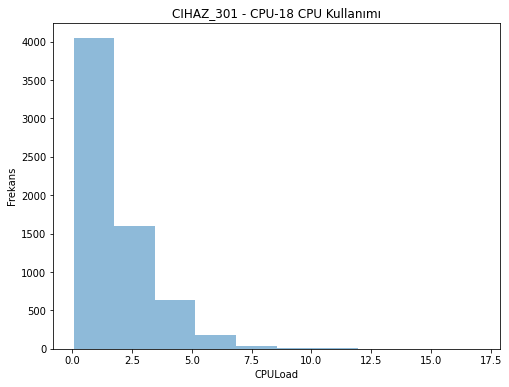

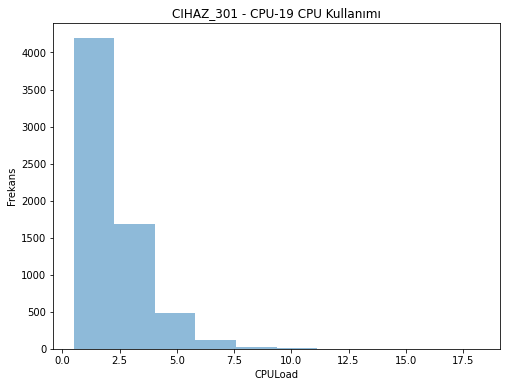

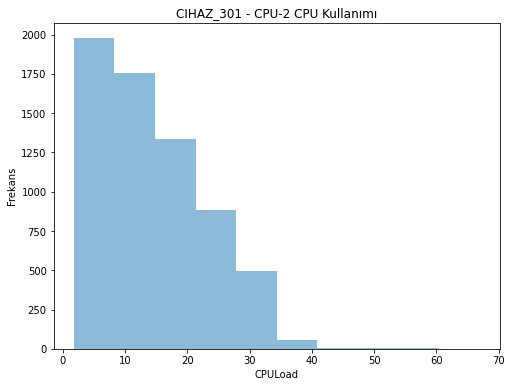

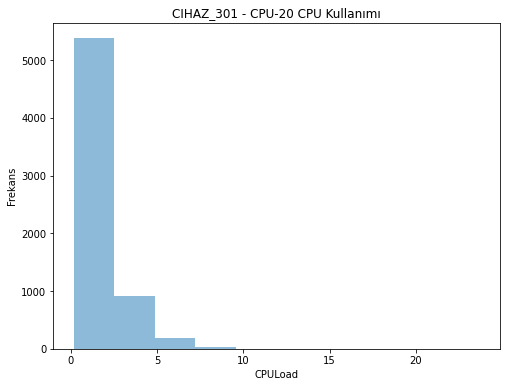

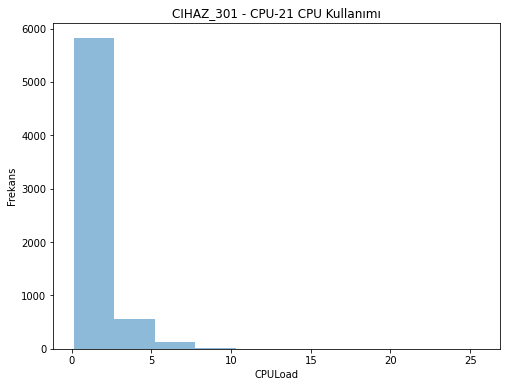

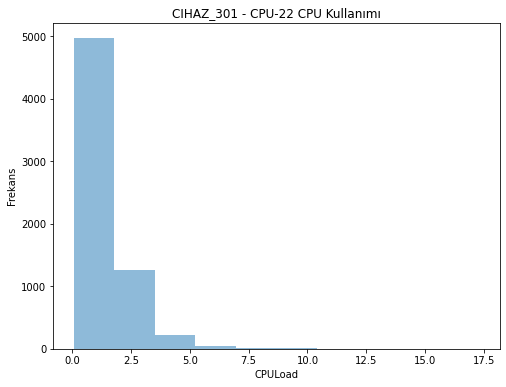

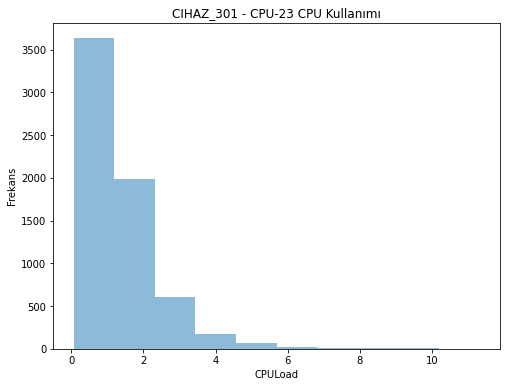

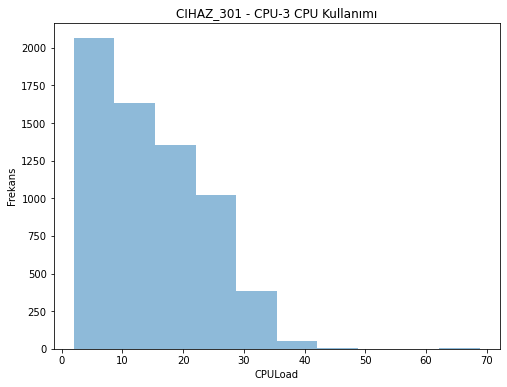

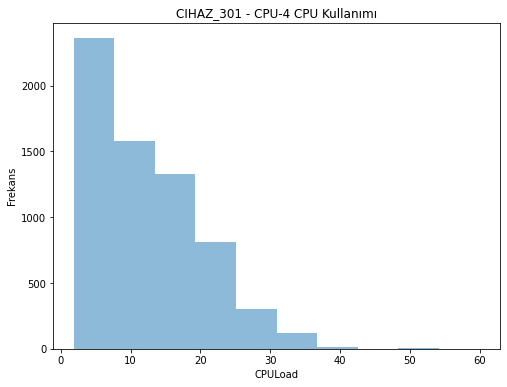

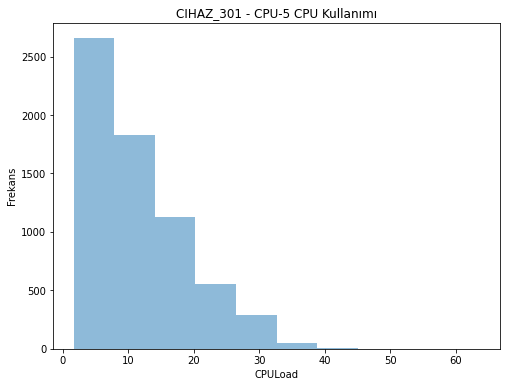

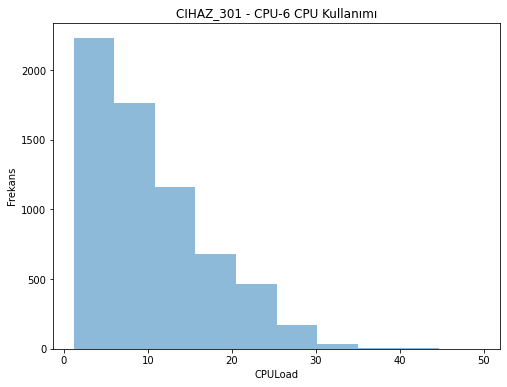

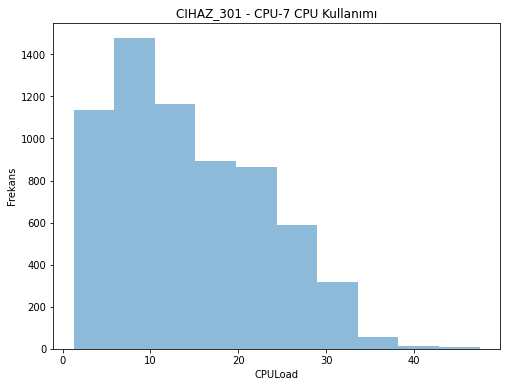

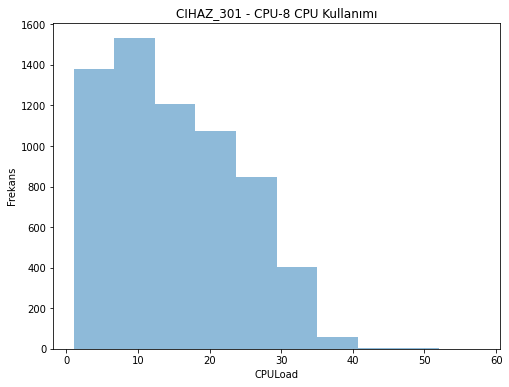

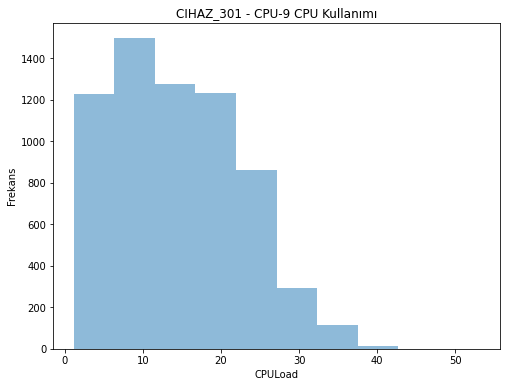

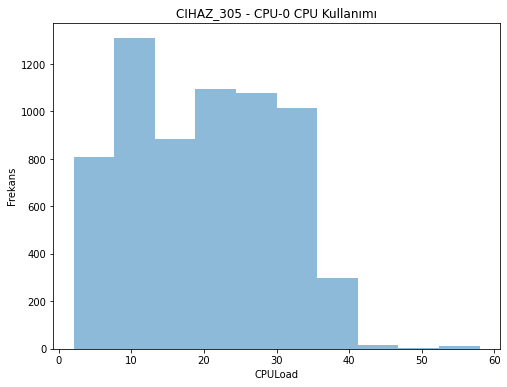

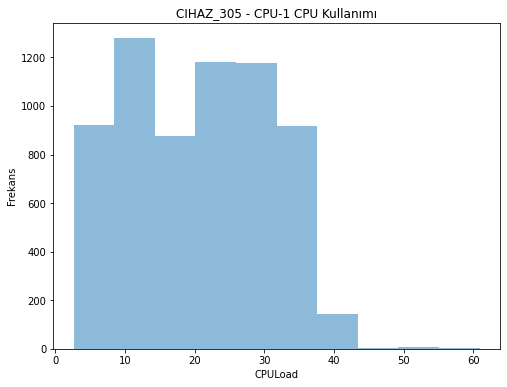

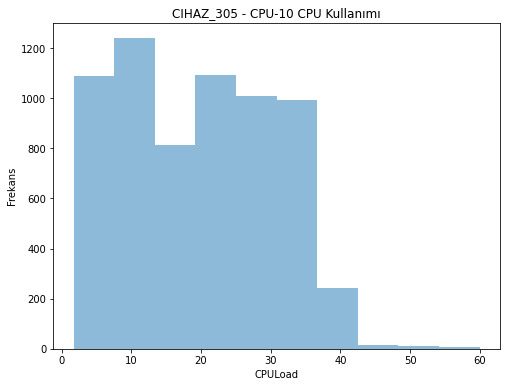

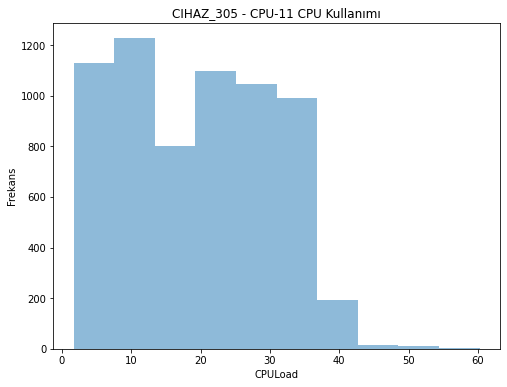

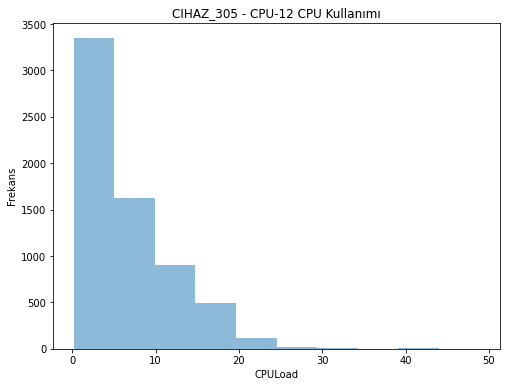

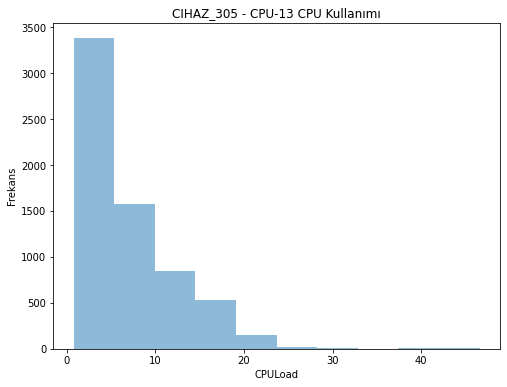

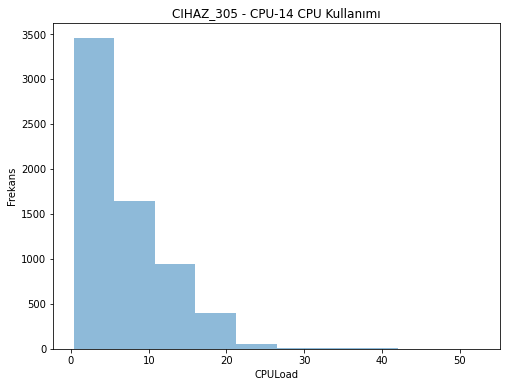

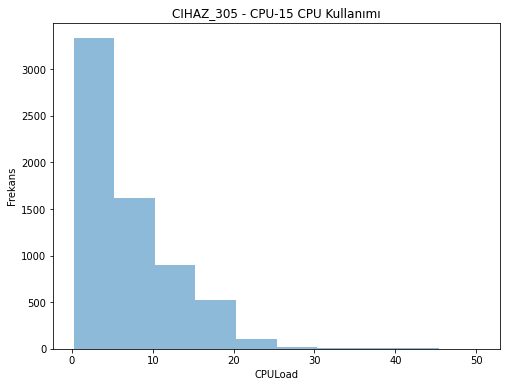

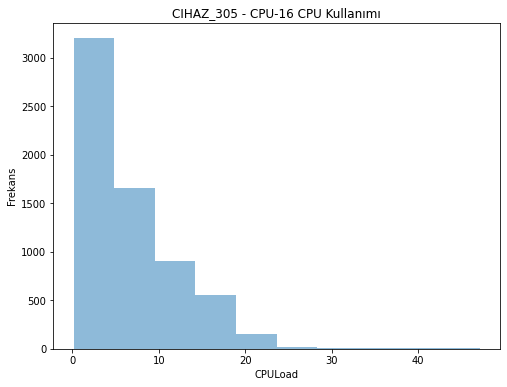

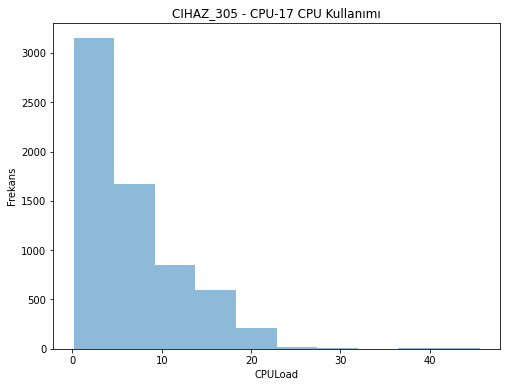

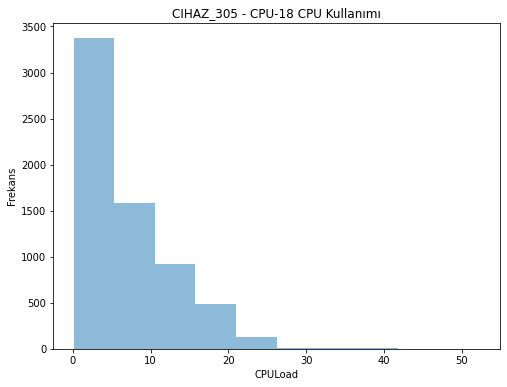

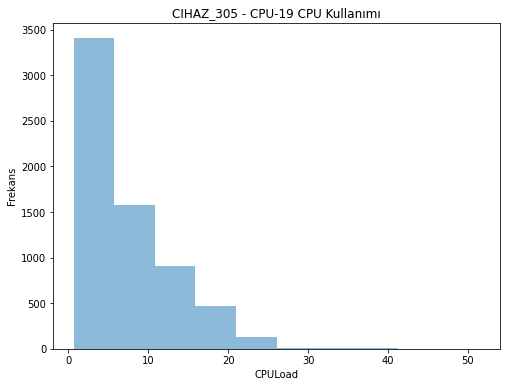

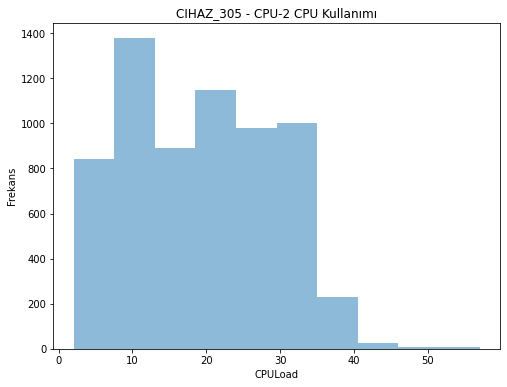

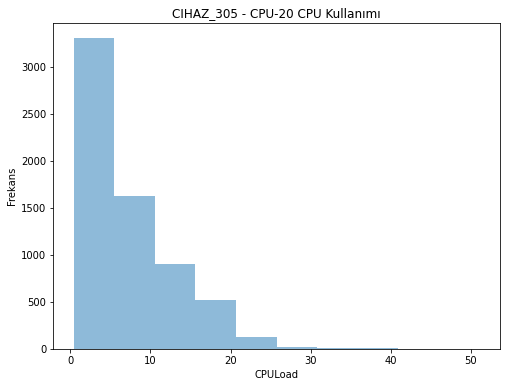

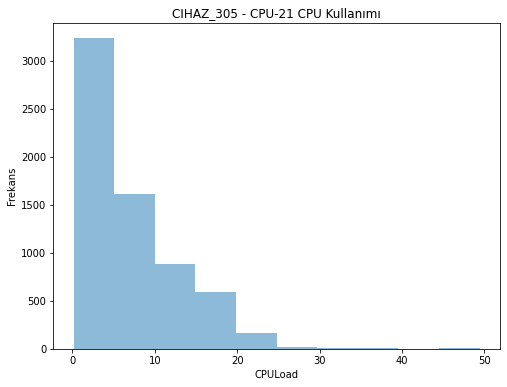

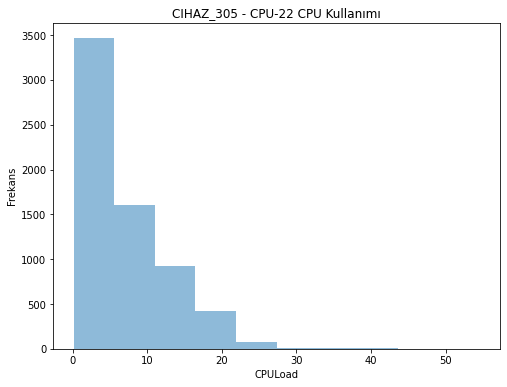

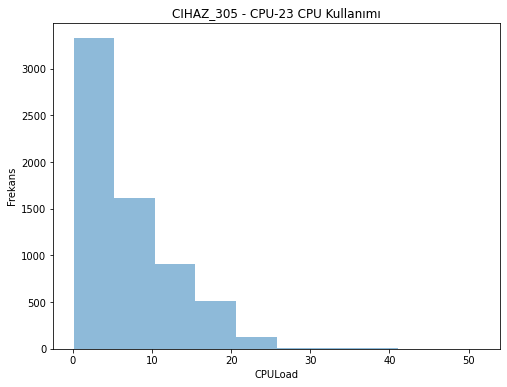

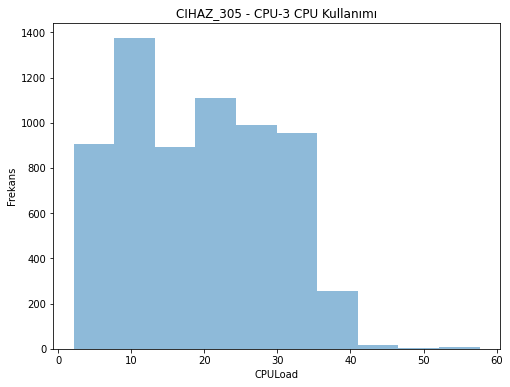

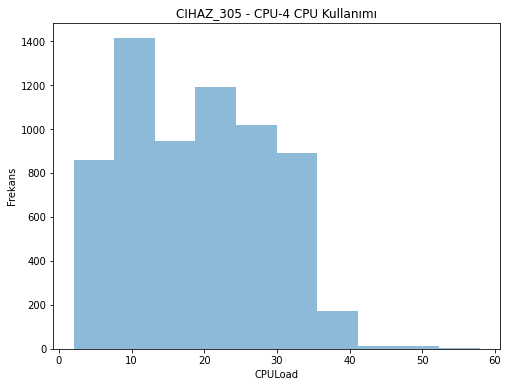

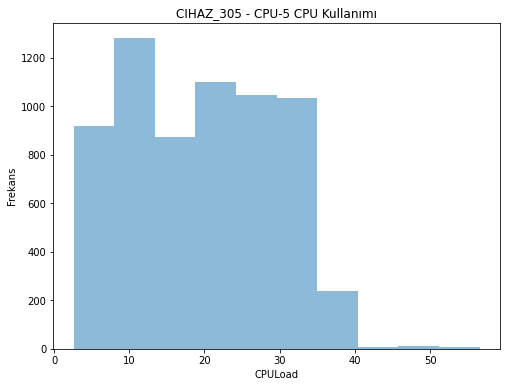

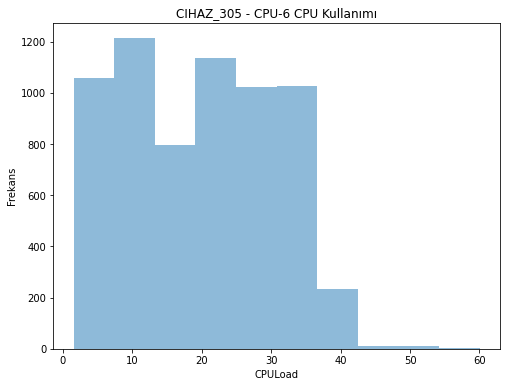

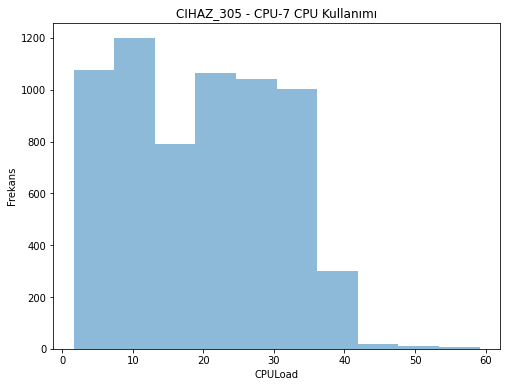

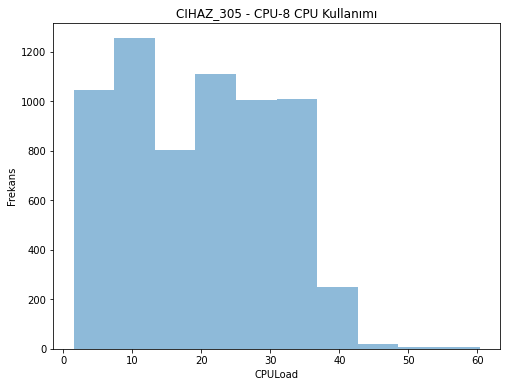

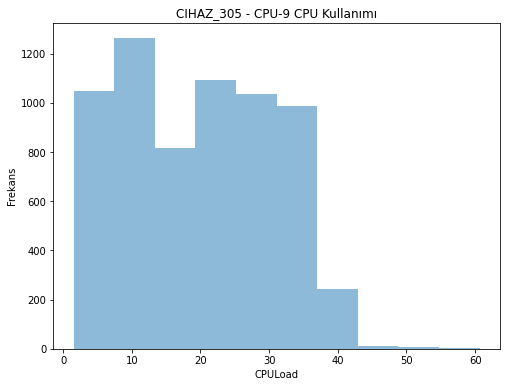

In [11]:
# Sunucu ve CPU türlerine göre histogramları bastır
servers = df['SERVER'].unique()

for server in servers:
    df_server = df[df['SERVER'] == server]
    cpus = df_server['CPU'].unique()

    for cpu in cpus:
        df_cpu = df_server[df_server['CPU'] == cpu]

        plt.figure(figsize=(8, 6))
        plt.hist(df_cpu['CPULOAD'], bins=10, alpha=0.5)
        plt.title(f'{server} - {cpu} CPU Kullanımı')
        plt.xlabel('CPULoad')
        plt.ylabel('Frekans')
        plt.show()


<Figure size 864x432 with 0 Axes>

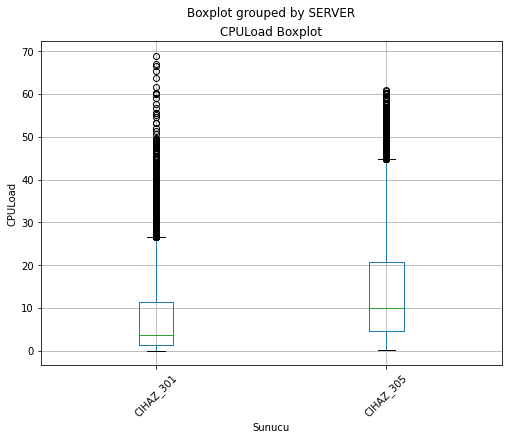

In [13]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

#Boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='CPULOAD', by='SERVER', figsize=(8, 6))
plt.title('CPULoad Boxplot')
plt.xlabel('Sunucu')
plt.ylabel('CPULoad')
plt.xticks(rotation=45)
plt.show()


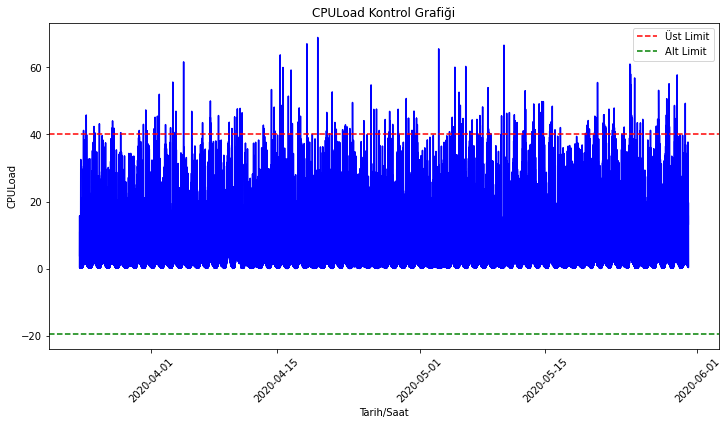

In [14]:
# Kontrol Grafiği
mean = df['CPULOAD'].mean()
std = df['CPULOAD'].std()
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

plt.figure(figsize=(12, 6))
plt.plot(df['DATETIME'], df['CPULOAD'], color='blue')
plt.axhline(y=upper_limit, color='red', linestyle='--', label='Üst Limit')
plt.axhline(y=lower_limit, color='green', linestyle='--', label='Alt Limit')
plt.title('CPULoad Kontrol Grafiği')
plt.xlabel('Tarih/Saat')
plt.ylabel('CPULoad')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Models

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from statsmodels.tsa.arima.model import ARIMA
import math
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
import pandas as pd
from sklearn.ensemble import IsolationForest

In [136]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop(columns=['CPU'], axis=1)
DF=train_df.groupby(['DATETIME', 'SERVER'])['CPULOAD'].mean()
new_df = DF.to_frame()
new_df.to_csv('new_train.csv')

In [137]:
test_df = pd.read_csv('test.csv')
DF=test_df.groupby(['DATETIME', 'SERVER'])['CPU'].count()
DFnew_df = DF.to_frame()
DFnew_df= DFnew_df.drop(columns=['CPU'], axis=1)
DFnew_df.to_csv('new_test.csv')

In [138]:
train_df = pd.read_csv('new_train.csv')


train_df['DATETIME'] = pd.to_datetime(train_df['DATETIME']).dt.tz_localize(None)  # Zaman dilimini kaldır

label_encoder = LabelEncoder()
train_df['SERVER'] = label_encoder.fit_transform(train_df['SERVER'])

#label_encoder_cpu = LabelEncoder()
#train_df['CPU'] = label_encoder_cpu.fit_transform(train_df['CPU'])


start_date = pd.to_datetime('2020-05-15')
end_date = pd.to_datetime('2020-05-30')
train_df_1 = train_df.loc[train_df['DATETIME'] < start_date]
test_df_1 = train_df.loc[(train_df['DATETIME'] >= start_date) & (train_df['DATETIME'] <= end_date)]

X_train = train_df_1[['DATETIME', 'SERVER']]
y_train = train_df_1['CPULOAD']
X_test = train_df_1[['DATETIME', 'SERVER']]
y_test = train_df_1['CPULOAD']

X_train['DATETIME'] = pd.to_datetime(X_train['DATETIME'])
X_train['DATETIME'] = X_train['DATETIME'].astype('int64') // 10**9  # UNIX zamanına dönüşümü

X_test['DATETIME'] = pd.to_datetime(X_test['DATETIME'])
X_test['DATETIME'] = X_test['DATETIME'].astype('int64') 


C:\Users\acer\AppData\Local\Temp/ipykernel_3808/563693393.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['DATETIME'] = pd.to_datetime(X_train['DATETIME'])
C:\Users\acer\AppData\Local\Temp/ipykernel_3808/563693393.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  X_train['DATETIME'] = X_train['DATETIME'].astype('int64') // 10**9  # UNIX zamanına dönüşümü
C:\Users\acer\AppData\Local\Temp/ipykernel_3808/563693393.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [139]:
test_df = pd.read_csv('new_test.csv')
label_encoder = LabelEncoder()
test_df['SERVER'] = label_encoder.fit_transform(test_df['SERVER'])

#label_encoder_cpu = LabelEncoder()
#test_df['CPU'] = label_encoder_cpu.fit_transform(test_df['CPU'])

test_df['DATETIME'] = pd.to_datetime(test_df['DATETIME'])
test_df['DATETIME'] = test_df['DATETIME'].astype('int64') 

test = test_df[['DATETIME','SERVER']]

C:\Users\acer\AppData\Local\Temp/ipykernel_3808/236919245.py:9: FutureWarning: casting datetime64[ns, pytz.FixedOffset(180)] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  test_df['DATETIME'] = test_df['DATETIME'].astype('int64')


"\ntrain_df = pd.read_csv('train.csv')\ntrain_df['DATETIME'] = pd.to_datetime(train_df['DATETIME'])\n\nlabel_encoder = LabelEncoder()\ntrain_df['SERVER'] = label_encoder.fit_transform(train_df['SERVER'])\n\nlabel_encoder_cpu = LabelEncoder()\ntrain_df['CPU'] = label_encoder_cpu.fit_transform(train_df['CPU'])\n\ntrain_df['DATETIME'] = pd.to_datetime(train_df['DATETIME'])\ntrain_df['DATETIME'] = train_df['DATETIME'].astype('int64') // 10**9  # UNIX zamanına dönüşümü\n\nX = train_df[['DATETIME','SERVER', 'CPU']]\ny = train_df['CPULOAD']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"

In [143]:
#RMSE loss value 
def rmse(test,predict):
    rmse = math.sqrt(mean_squared_error(y_test, predict))
    print('RMSE:', rmse)
    return rmse

In [144]:
#Submission
def submission(predict,modelname):
    forecast = pd.DataFrame({'index': range(len(predict)), 'CPULOAD': predict})
    forecast.to_csv(f'{modelname}.csv', index=False)

Linear 

In [145]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
LinearRegressionrmse=rmse(y_test,y_pred)

prediction = model.predict(test)
submission(prediction,"linearregression")

RMSE: 283629957150.2536


In [146]:
#KNN Regression
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
KNeighborsRegressorrmse=rmse(y_test,y_pred)

prediction = model.predict(test)
submission(prediction,"KNNregression")

RMSE: 6.593102217683691


In [148]:
#Random Forest 
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RandomForestRegressorrmse=rmse(y_test,y_pred)

prediction = model.predict(test)
submission(prediction,"randomforest")

RMSE: 5.8768565964511215


In [149]:
#Decision Tree 
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
DecisionTreeRegressorrmse=rmse(y_test,y_pred)

prediction = model.predict(test)
submission(prediction,"decisiontree")

RMSE: 5.929897471734728


In [151]:
model = IsolationForest(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
IsolationForestRegressorrmse=rmse(y_test,y_pred)

prediction = model.predict(test)
submission(prediction,"IsolationForest")

RMSE: 12.675549115684756


Boosting

In [152]:
# XGBoost Regressor 
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
XGBRegressorrmse=rmse(y_test,y_pred)

prediction = model.predict(test)
submission(prediction,"XGBoost")


RMSE: 5.904885711147903


In [153]:
# Gradient Boosting Regressor 
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
GradientBoostingRegressorrmse=rmse(y_test,y_pred)

prediction = gb_model.predict(test)
submission(prediction,"GradientBoosting")

RMSE: 5.904885711147903


In [154]:
# AdaBoost Regressor 
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
ada_y_pred = ada_model.predict(X_test)
AdaBoostRegressorrmse=rmse(y_test,y_pred)

prediction = ada_model.predict(test)
submission(prediction,"AdaBoostBoosting")

RMSE: 5.904885711147903


ARIMA (autoregressive integrated moving average)

In [158]:
X = train_df['DATETIME'].values
y = train_df['CPULOAD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ARIMA(y_train, order=(0,0,1))  # p,d,q
model_fit = model.fit()

start_index = len(X_train)
end_index = len(X_train) + len(X_test) - 1
y_pred = model_fit.predict(start=start_index, end=end_index)

ARIMArmse=rmse(y_test,y_pred)

test_x = test_df['DATETIME'].values
end=len(test_x) - 1
prediction = model_fit.predict(start=0, end=end)
submission(prediction,"ARIMA")

RMSE: 6.733818935373199


In [156]:
# ARIMA (datetime,server,cpu)
X = train_df[['DATETIME', 'SERVER']]
y = train_df['CPULOAD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ARIMA(y_train, order=(0,0,0))  
model_fit = model.fit()

start_index = len(X_train)
end_index = len(X_train) + len(X_test) - 1
y_pred = model_fit.predict(start=start_index, end=end_index)


ARIMA2rmse=rmse(y_test,y_pred)
submission(prediction,"ARIMA2")

RMSE: 6.733823965917031


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1,0,1,12))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+11, exog=None, dynamic=True)

<BarContainer object of 9 artists>

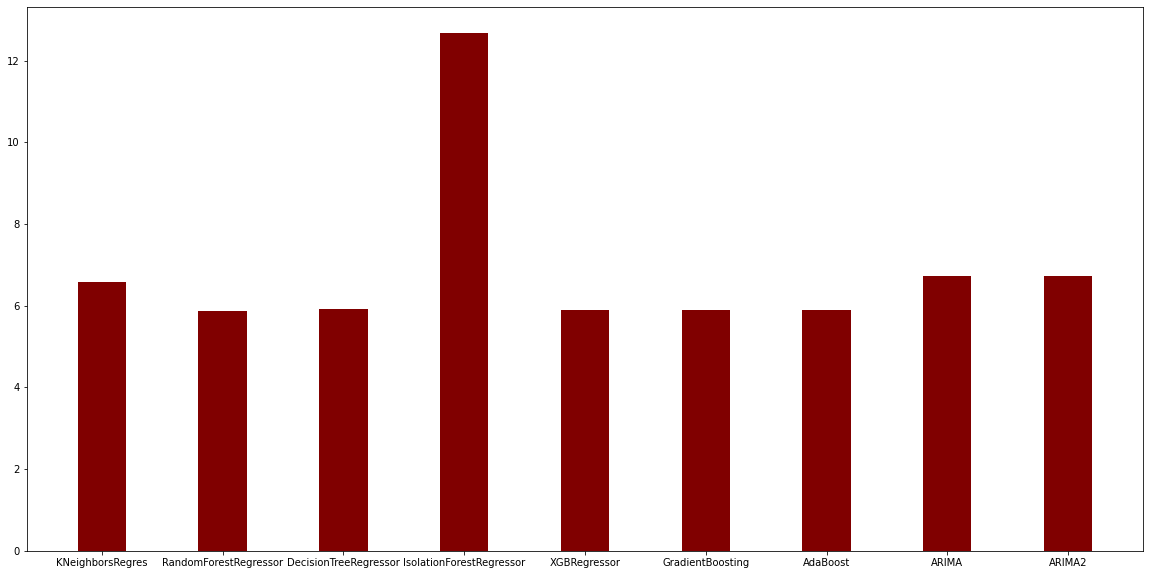

In [171]:
#sonuçlar (RMSE):
sonuc=[KNeighborsRegressorrmse,RandomForestRegressorrmse,DecisionTreeRegressorrmse,IsolationForestRegressorrmse,XGBRegressorrmse,GradientBoostingRegressorrmse,AdaBoostRegressorrmse,ARIMArmse,ARIMA2rmse]

model_name=["KNeighborsRegres","RandomForestRegressor","DecisionTreeRegressor","IsolationForestRegressor","XGBRegressor","GradientBoosting","AdaBoost","ARIMA","ARIMA2"]

fig = plt.figure(figsize = (20, 10))
plt.bar(model_name, sonuc, color ='maroon',
        width = 0.4)

In [172]:
LSTM_RMSE=1.065999466705841

LSTM colab üzerinde eğitildi